## CUSTOMER CHURN CLASSIFICATION

**Business Undestanding**

**Introduction**

**Problem statement**: Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
If we can figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

**Project Goal**: In this project, I aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem. The predictive modelling will be done after a comprehensive analysis of the dataset provided.

### **Stakeholders**:
- Business Team

#### **Key Metrics and Success Criteria**
- The models should have an accuracy score of 85%.
- Good models are expected to have an F1 score of >0.80 or 80%.
- An Roc curve of 80% is ideal for the model generalize well.
- There should be atleast 4 Baseline models.
- All hyperparameter tuning should only be only to Baseline models if they exceed their F1 score.
#### The following describes the columns present in the data.

**Gender** -- Whether the customer is a male or a female

**SeniorCitizen** -- Whether a customer is a senior citizen or not

**Partner** -- Whether the customer has a partner or not (Yes, No)

**Dependents** -- Whether the customer has dependents or not (Yes, No)

**Tenure** -- Number of months the customer has stayed with the company

**Phone Service** -- Whether the customer has a phone service or not (Yes, No)

**MultipleLines** -- Whether the customer has multiple lines or not

**InternetService** -- Customer's internet service provider (DSL, Fiber Optic, No)

**OnlineSecurity** -- Whether the customer has online security or not (Yes, No, No Internet)

**OnlineBackup** -- Whether the customer has online backup or not (Yes, No, No Internet)
**DeviceProtection** -- Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport** -- Whether the customer has tech support or not (Yes, No, No internet)

**StreamingTV** -- Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies** -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

**Contract** -- The contract term of the customer (Month-to-Month, One year, Two year)

**PaperlessBilling** -- Whether the customer has paperless billing or not (Yes, No)

**Payment Method** -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

**MonthlyCharges** -- The amount charged to the customer monthly

**TotalCharges** -- The total amount charged to the customer

**Churn** -- Whether the customer churned or not (Yes or No)

   



#### Objectives

1. **Identify Key Factors Influencing Churn**:
   My primary goal is to determine which customer attributes, such as demographics, service usage, and contract type, significantly influence churn. I will explore various variables, including gender, senior citizen status, partnership status, dependents, tenure, type of internet service, availability of online security, backup, and other technical support services.

2. **Predict Customer Churn**:
   I will develop a predictive model that uses customer data to forecast the likelihood of churn. This model will help the company proactively identify at-risk customers and implement retention strategies to minimize churn rates. I will utilize various features, such as monthly charges, total charges, contract type, payment method, and service usage patterns.

3. **Segment Customer Base**:
   I will segment the customer base into distinct groups based on service usage, demographics, and tenure. This segmentation will enable the company to tailor marketing and retention strategies to specific customer groups, thereby enhancing customer satisfaction and loyalty.

4. **Optimize Customer Retention Strategies**:
   I will analyze the effectiveness of different retention strategies by examining historical data and identifying patterns. I will recommend the most effective measures to reduce churn, such as offering incentives, improving service quality, or modifying contract terms.

5. **Understand Revenue Impact**:
   I will assess the impact of churn on monthly and total revenue. By identifying high-risk customers who contribute significantly to revenue loss, I can develop strategies to retain these customers. This analysis will focus on understanding how churn affects the company's financial health and identifying key revenue drivers.

#### Business Questions

1. **What are the demographic characteristics of customers who are more likely to churn?**
   - I will explore the relationship between demographic variables (gender, senior citizen status, partnership status, dependents) and churn. For instance, are senior citizens more likely to churn than younger customers? Do customers with dependents churn at a different rate compared to those without?

2. **How does the tenure of a customer relate to their likelihood of churning?**
   - By analyzing the tenure column, I will determine if customers who have been with the company longer are more or less likely to churn. This analysis could reveal critical points in the customer lifecycle where churn is more likely, enabling targeted retention efforts.

3. **What role do service-related factors (e.g., internet service, tech support) play in customer churn?**
   - I will understand how the type and quality of services provided (internet service, online security, online backup, device protection, tech support, streaming services) impact churn. For example, does having multiple services reduce the likelihood of churn?

4. **How do different contract types and payment methods affect customer churn?**
   - I will examine the relationship between contract terms (month-to-month, one-year, two-year contracts), payment methods (electronic check, mailed check, bank transfer, credit card), and churn to provide insights into which contract types and payment methods are more stable.

5. **What is the relationship between monthly charges and total charges with customer churn?**
   - By analyzing the monthly charges and total charges, I will determine if higher or lower charges correlate with churn. This could indicate if pricing strategies need to be adjusted to retain customers.

#### Hypothesis Test

**Hypothesis:**
- **Null Hypothesis (H0):** There is no significant relationship between the type of internet service (DSL, Fiber Optic, No) and customer churn.
- **Alternative Hypothesis (H1):** There is a significant relationship between the type of internet service (DSL, Fiber Optic, No) and customer churn.



2. DATA UNDERSTANDING

#### Importing the Necessary Packages

In [110]:
#import packages
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import catboost as cb

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, roc_curve, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
from sklearn.metrics import r2_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import json
import os
import pickle
from sklearn.utils import estimator_html_repr
from IPython.core.display import display, HTML
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pyodbc    
from dotenv import dotenv_values
from scipy.stats import chi2_contingency

%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
print('Load Libraries-Done')

Load Libraries-Done


#### Load Datasets

In [4]:
# set maximum display for columns and rows
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#### Loading first dataset from the database

In [5]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("user")
password = environment_variables.get("password")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};"

In [6]:
connection = pyodbc.connect(connection_string)

In [7]:
# selecting tables from DB
db_query = ''' SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE' '''

In [8]:
# call selected table from DataFrame
data=pd.read_sql(db_query, connection)
 
data

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP2_Telco_churn_first_3000,BASE TABLE


In [9]:
query = "select * from dbo.LP2_Telco_churn_first_3000"
data1 = pd.read_sql(query, connection)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### Loading the second dataset

In [10]:
data2 = pd.read_csv('LP2_Telco-churn-second-2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


#### Loading the test dataset

In [11]:
test_data = pd.read_excel('Telco-churn-last-2000.xlsx')
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


## Exploratory Data Analysis (EDA)
***Data quality Assessment & Exploring data***

In [12]:
# Print column names for comparison
print("Column names in data1:")
print(data1.columns)
print("\n")

# Column names for data2
print("Column names in data2:")
print(data2.columns)
print("\n")

# Column names for data3
print("Column names in data3:")
print(test_data.columns)
print("\n")



Column names in data1:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Column names in data2:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Column names in data3:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'

In [13]:
# check whether the column names match
data1.columns == data2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [14]:
#concatenate the 2 datasets
df = pd.concat([data1, data2], ignore_index=True)

# Display the result
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [15]:
#check for the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [16]:
#changing dtypes for seniorcitizen and total charges
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Converting 'TotalCharges' to numeric, 
test_data['TotalCharges'] = pd.to_numeric(
test_data['TotalCharges'], errors='coerce')

In [17]:
#check null values
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [18]:
#check null values for the test data
test_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [19]:
# Imputing with the mode for categorical columns
categorical_columns = df.select_dtypes(
    include=['object', 'bool']).columns
for column in categorical_columns:
    if df[column].isnull().any():
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
     

In [20]:
# Filling missing values with the mean value of the column
mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [21]:
#confirm state of missing values after imputation
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
#check for duplicates
df.duplicated().sum()

0

In [23]:
# check descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.000000,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775,70.550003,90.050003,118.650002
TotalCharges,5043.0,2302.062861,2267.682399,18.799999,418.000,1406.000000,3857.575073,8670.100000


In [24]:
#check descriptive statistics for categorical columns
df.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
SeniorCitizen,5043,2,False,4224
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,5043,5,False,1706
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,5,False,2129
OnlineBackup,5043,5,False,1971


In [25]:
#check the unique values in the column to confirm
for column in df.columns:
    #check whether the column is not a numerical column
    if(df[column].dtype not in['int64','float64']):
        #print out the unique values in categorical columns
        print(f'column: {column}\nunique values: {df[column].unique()}')
        print(70 * '-')

column: customerID
unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------
column: gender
unique values: ['Female' 'Male']
----------------------------------------------------------------------
column: SeniorCitizen
unique values: [False True]
----------------------------------------------------------------------
column: Partner
unique values: [True False 'No' 'Yes']
----------------------------------------------------------------------
column: Dependents
unique values: [False True 'No' 'Yes']
----------------------------------------------------------------------
column: PhoneService
unique values: [False True 'Yes' 'No']
----------------------------------------------------------------------
column: MultipleLines
unique values: [False True 'No' 'No phone service' 'Yes']
----------------------------------------------------------------------
column: InternetService
unique va

In [26]:
# Unifying the values
bool_columns = ['Partner', 'Dependents', 'PhoneService', 'Churn', 'MultipleLines',
                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                      'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
for col in bool_columns:
    df[col] = df[col].map({True:'Yes', False: 'No'}).fillna('No')

In [27]:
#unique values in the data
columns = df.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
#confirm unique values again
for column in columns:
    print(f'{column}')
    print(f'There are {df[column].unique().size} unique values')
    print(f'There are {df[column].unique()}')
    print('='* 50)

customerID
There are 5043 unique values
There are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
There are ['Female' 'Male']
SeniorCitizen
There are 2 unique values
There are [False True]
Partner
There are 2 unique values
There are ['Yes' 'No']
Dependents
There are 2 unique values
There are ['No' 'Yes']
tenure
There are 73 unique values
There are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 2 unique values
There are ['No' 'Yes']
MultipleLines
There are 2 unique values
There are ['No' 'Yes']
InternetService
There are 3 unique values
There are ['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 2 unique values
There are ['No' 'Yes']
OnlineBackup
There are 2 unique values
There are ['Yes' 'No']
DeviceProtection
There are

**Univariate Analysis**

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,False,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [30]:
#save the cleaned dataset
#save into csv file
df.to_csv("Telco_churn_cleaned.csv", index=False)

In [31]:
#Dropping customerID from train_data
df.drop('customerID', axis=1, inplace=True)
test_data.drop('customerID', axis=1, inplace=True)

#### UNIVARIATE ANALYSIS

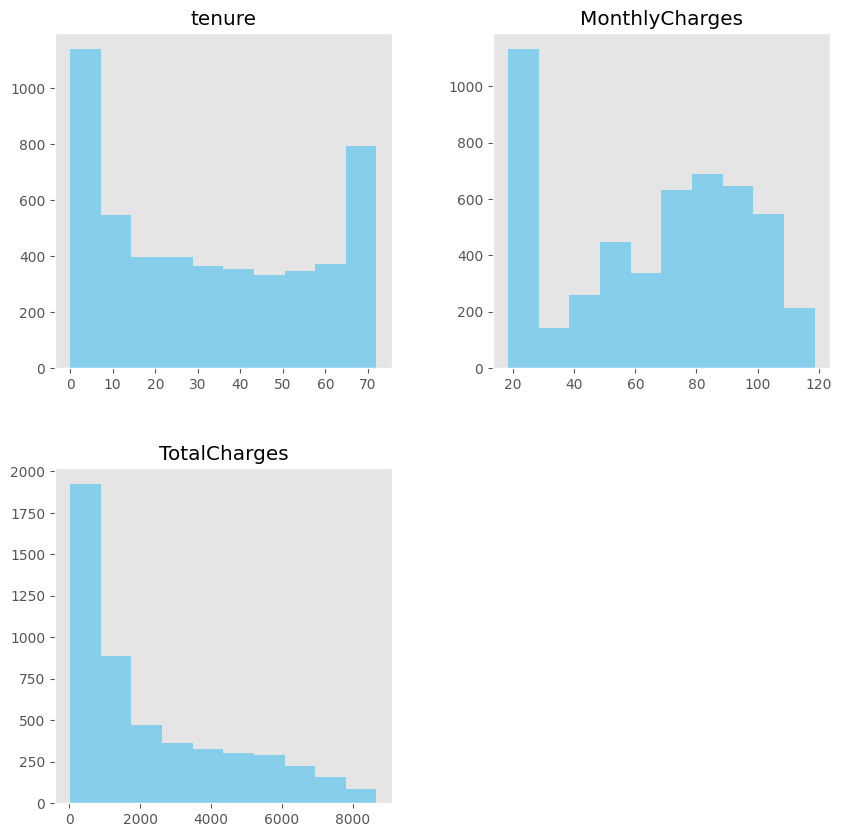

In [32]:
#plot the histograph for the  numerical columns
df.hist(figsize=(10,10), grid=False, color='skyblue')
plt.show()

#### Key Insights
1. There are no duplicates in the datasets.
2. The dataset is not evenly distributed.

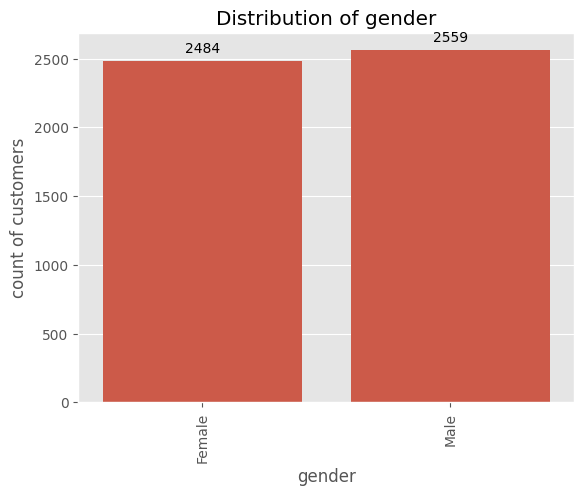

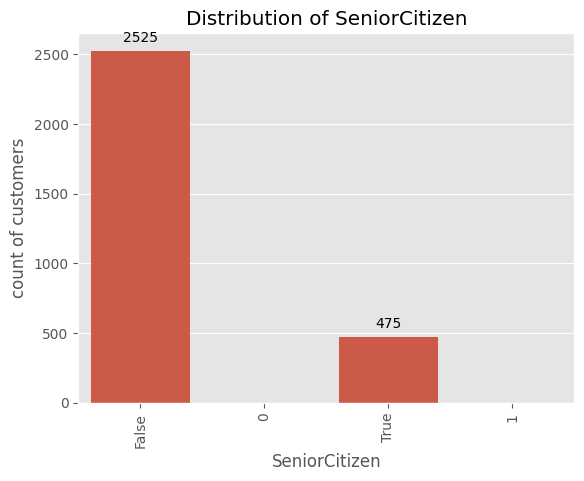

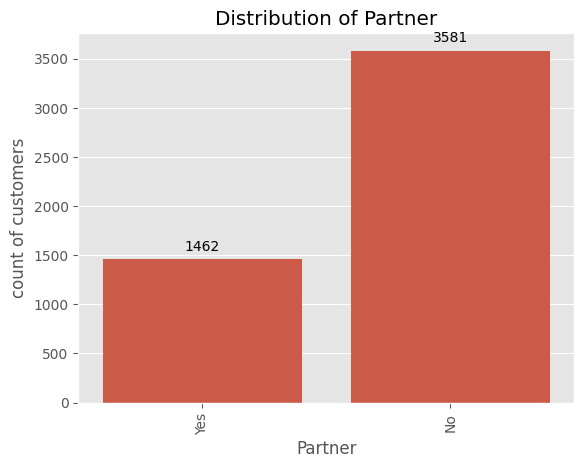

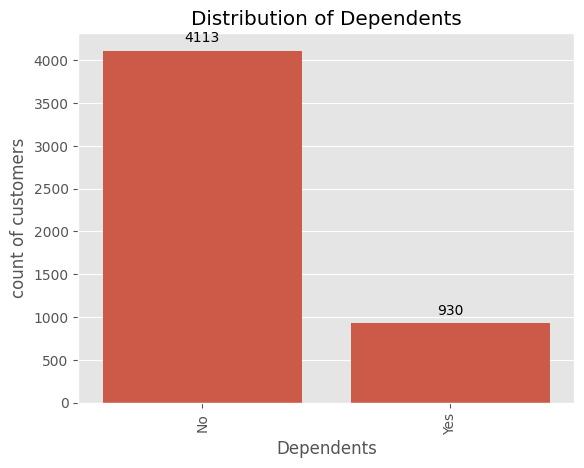

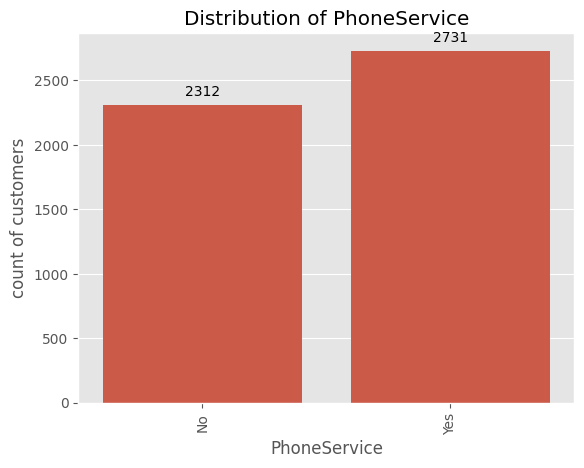

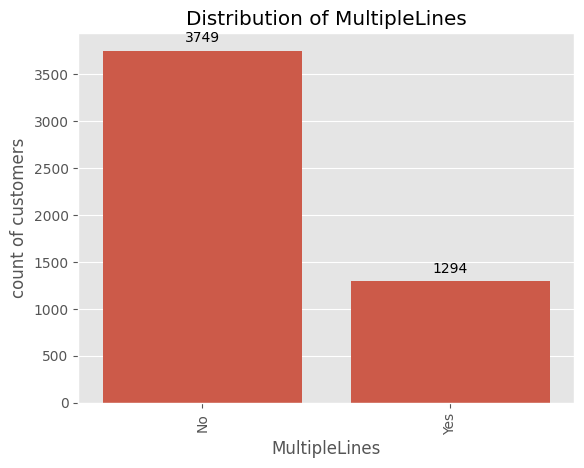

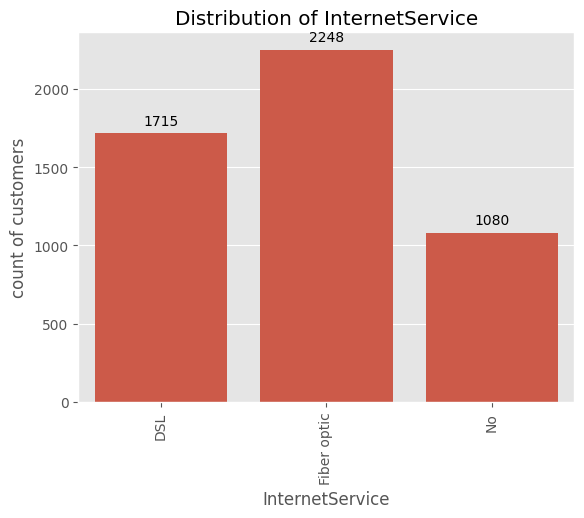

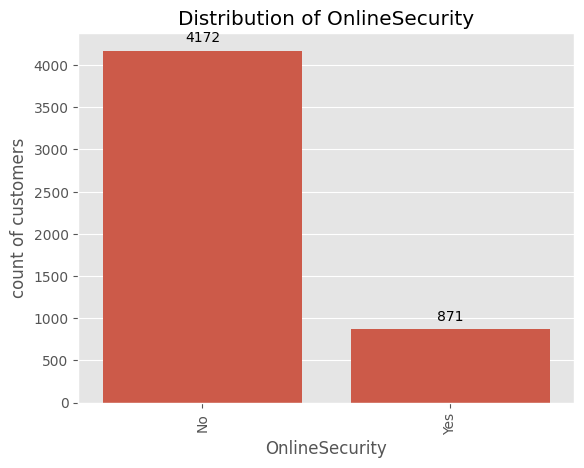

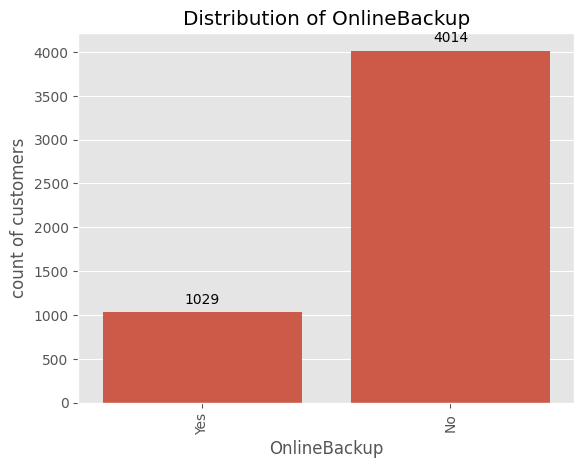

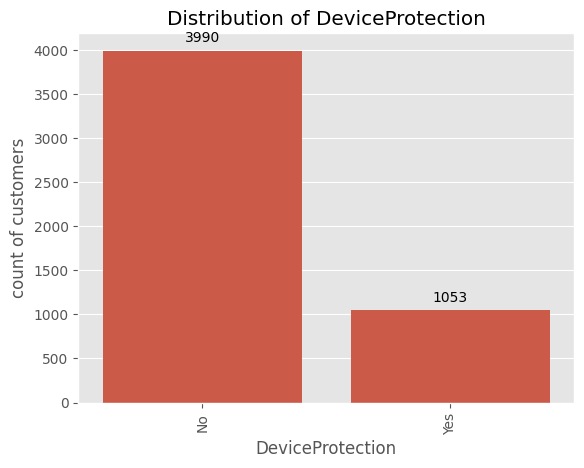

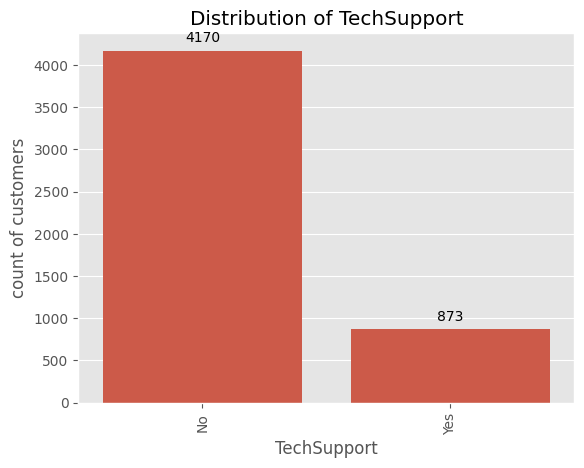

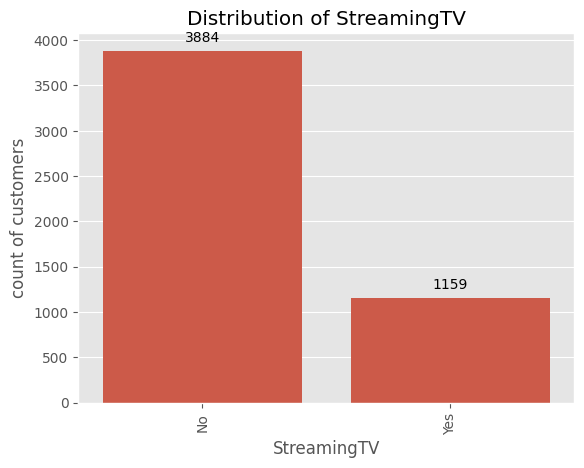

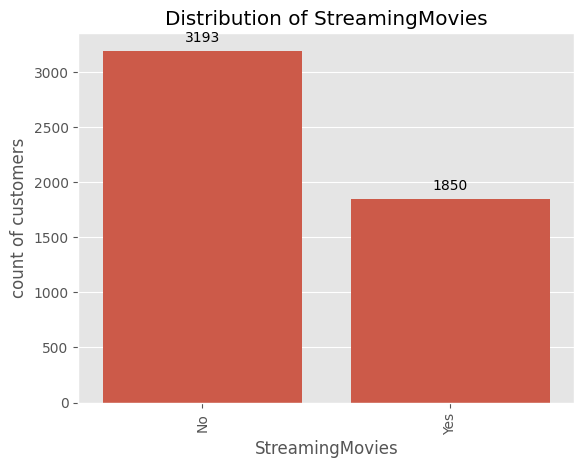

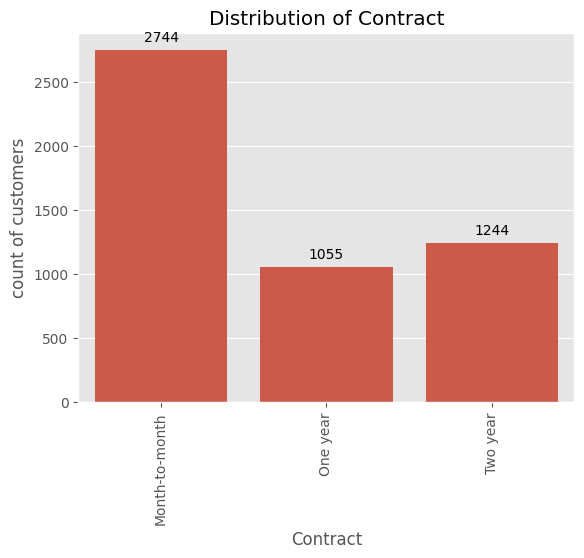

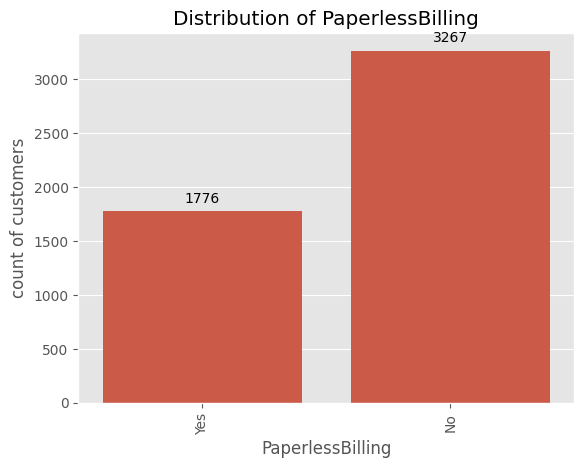

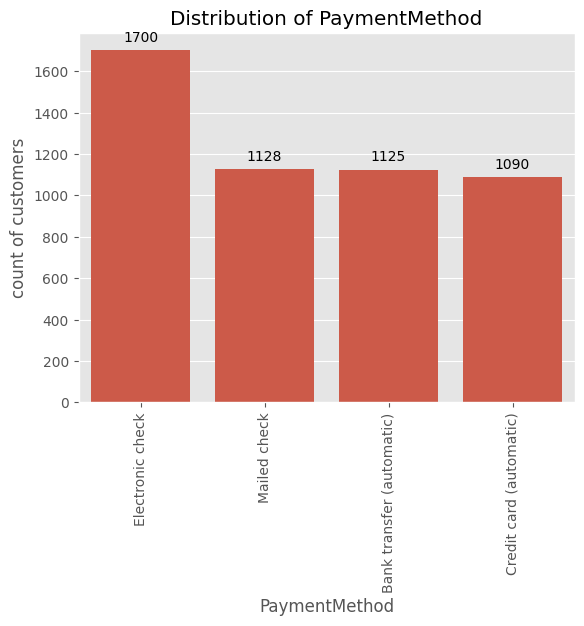

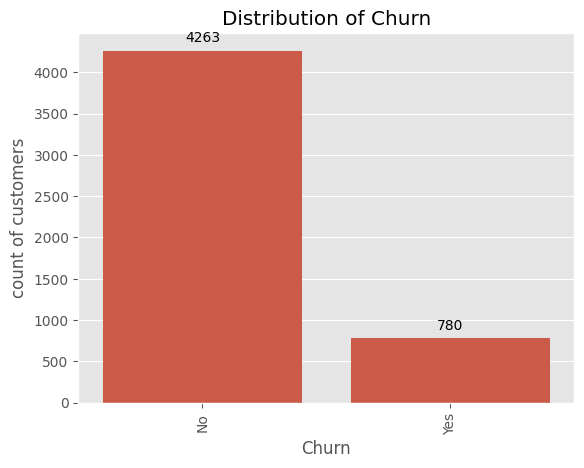

In [33]:
# Distribution of the categorical columns
for i, predictor in enumerate(df.drop(columns=['TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i)
    plot=sns.countplot(data=df, x=predictor)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {predictor}')
    plt.xlabel(f'{predictor}')
    plt.ylabel('count of customers')
    # Annotate the bars with the actual counts
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    plt.show()

**conclusions on categorical distribution**

- Customers with month-to-month contracts are more likely to churn compared to those with longer-term contracts. This suggests that customers on short-term commitments feel less bound and possibly less satisfied, leading to higher churn rates.
- The method of payment also seems to influence churn, with electronic checks showing a higher churn rate. This might be due to the demographics or the convenience factors associated with this payment method.
- Customers with fiber optic services show a higher churn rate compared to those with DSL. This might reflect issues like cost or service expectations not being met with the higher-speed option.
- Having tech support appears to be a significant factor in retention, as customers without tech support show higher churn rates. This suggests that better customer support could improve customer retention.
- There isn't a stark difference in churn rates based on whether customers have multiple lines or not, suggesting that simply having multiple lines isn't a deciding factor for churn.
- Customers who subscribe to streaming TV services have slightly higher churn rates, particularly those without the service. This might suggest that value-added services like streaming could either be a retention tool or a point of dissatisfaction if not handled correctly.

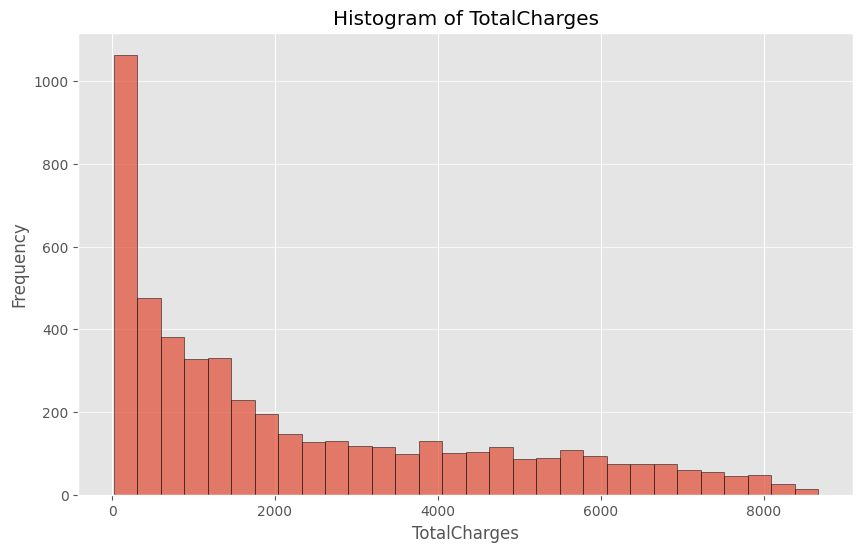

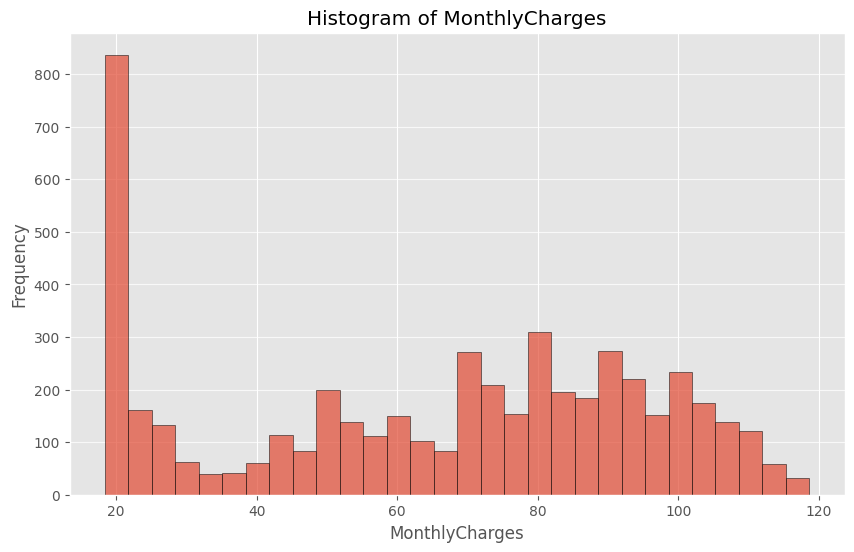

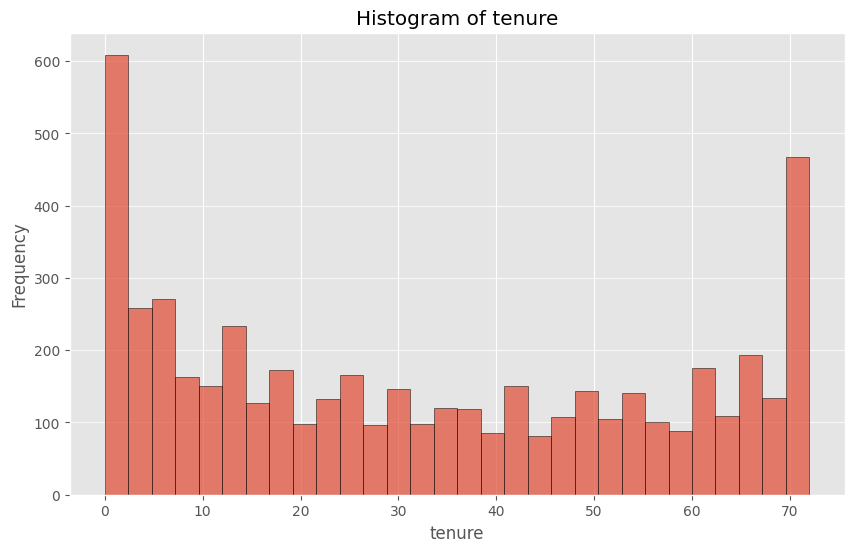

In [34]:
# Distribution of the numerical columns
for column in ['TotalCharges', 'MonthlyCharges', 'tenure']:
    plt.figure(figsize=(10,6))
    plt.hist(df[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

**distribution of numerical columns conclusion**
- Longer tenure correlates strongly with lower churn, indicating the importance of focusing retention strategies on newer    customers.
- The spread of monthly charges shows that while many customers contribute a small amount each month, there are also a significant number of customers who pay more, contributing to higher overall revenue..
- Most customers have low total charges, which could suggest a large number of new customers or customers on lower plans.
The small number of customers with high total charges might be the long-term or high-value customers.

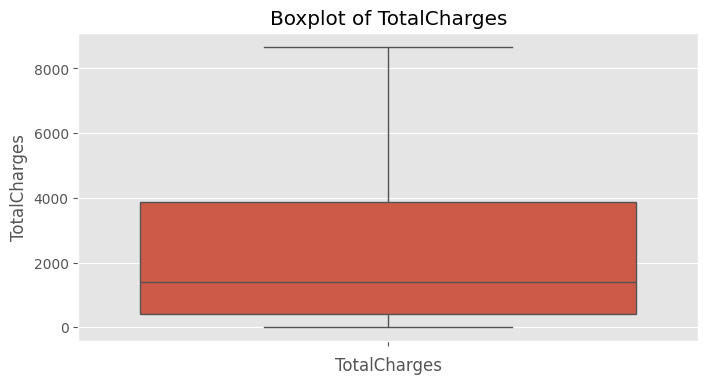

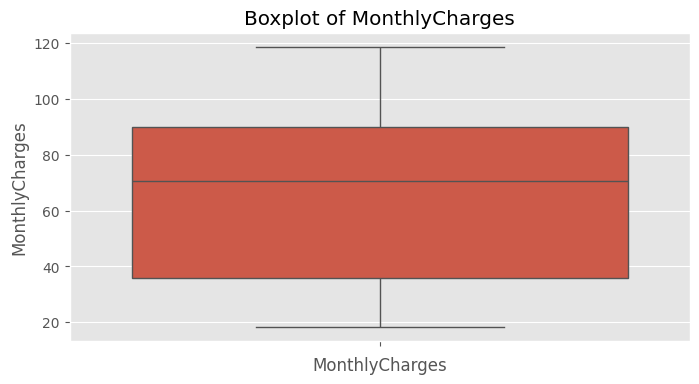

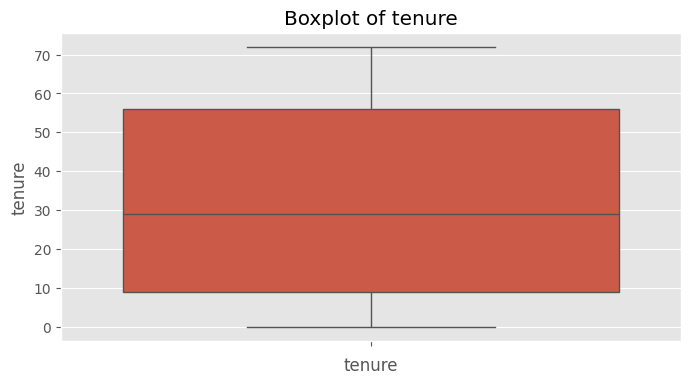

In [35]:
# boxplot of the numerical columns
for column in ['TotalCharges', 'MonthlyCharges', 'tenure']:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

- The numerical columns do not have outliers.

**Bivariate & Multivariate Analysis**

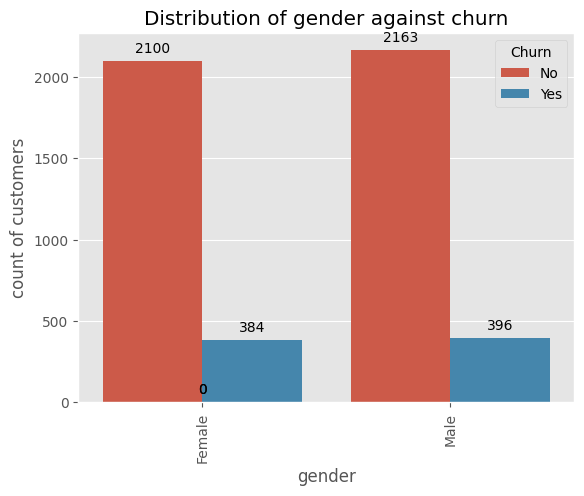

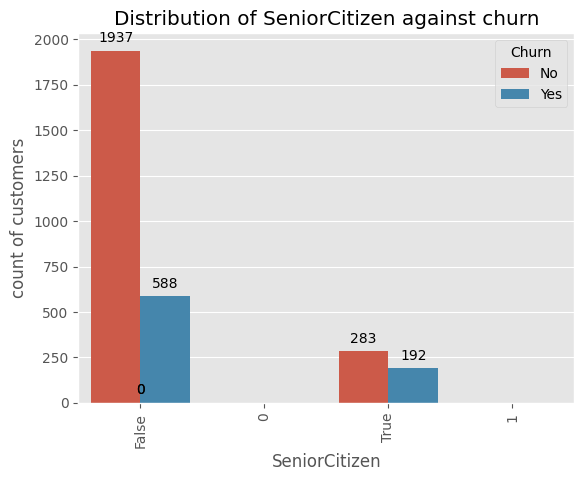

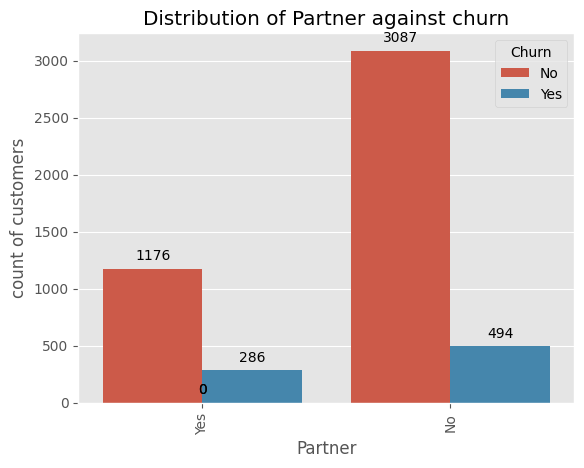

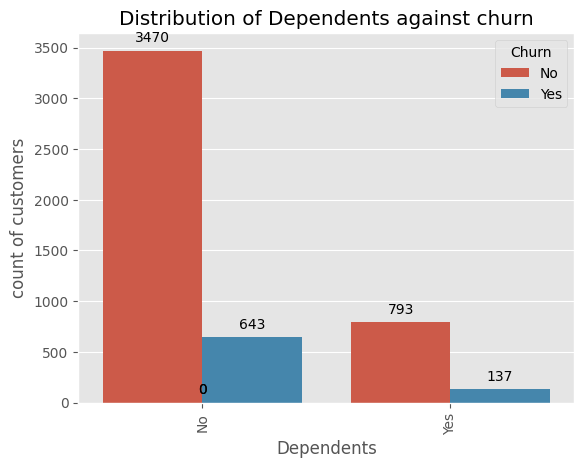

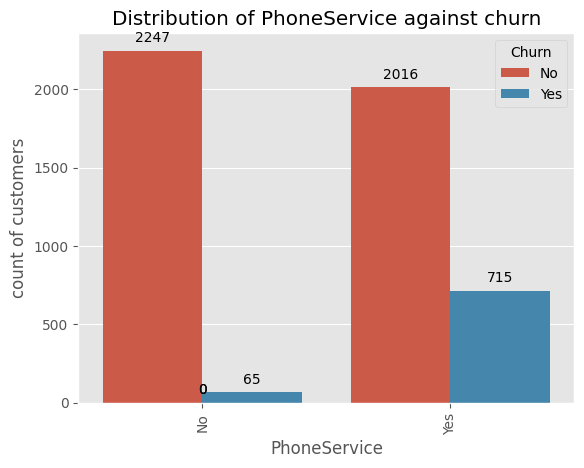

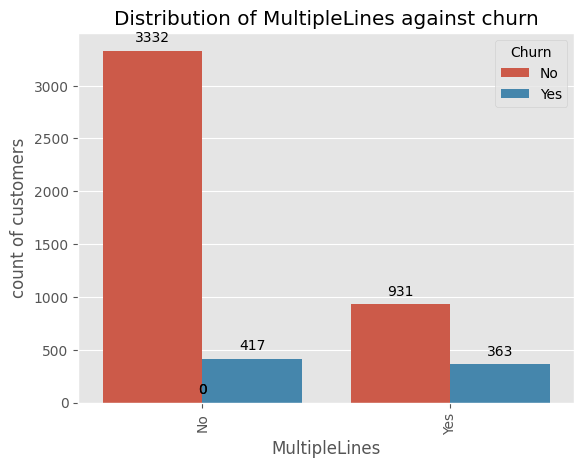

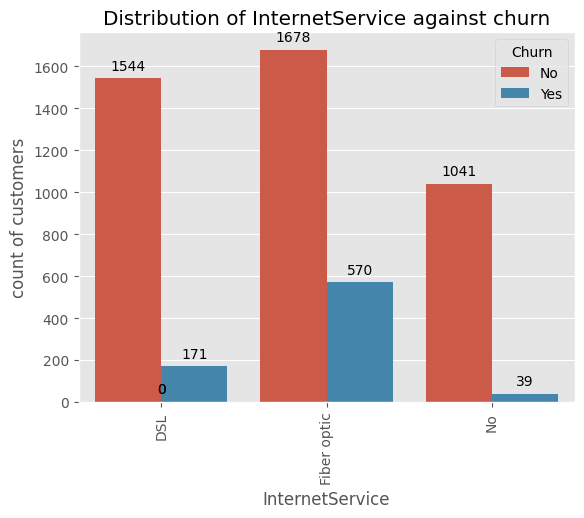

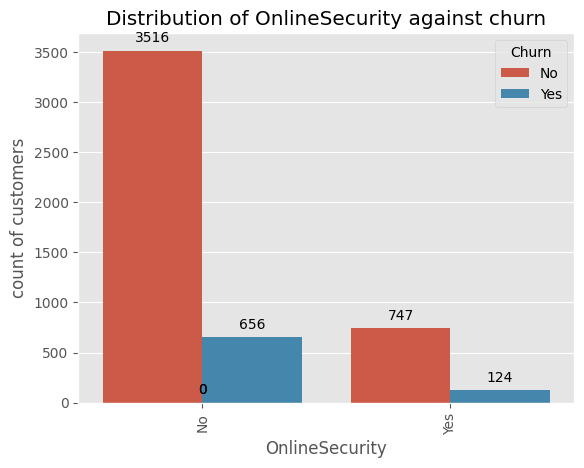

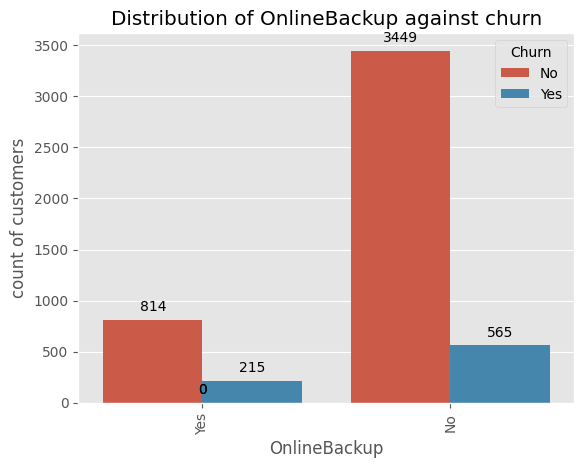

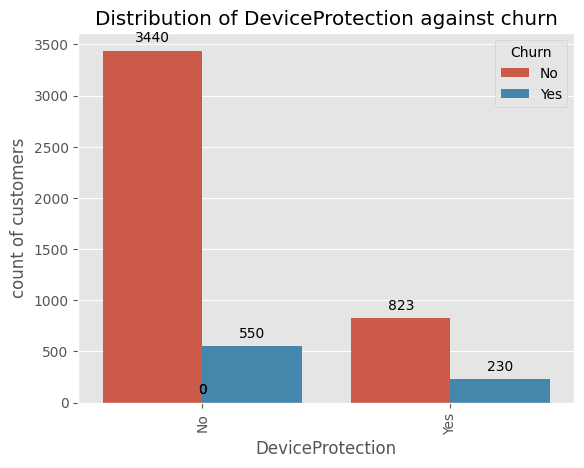

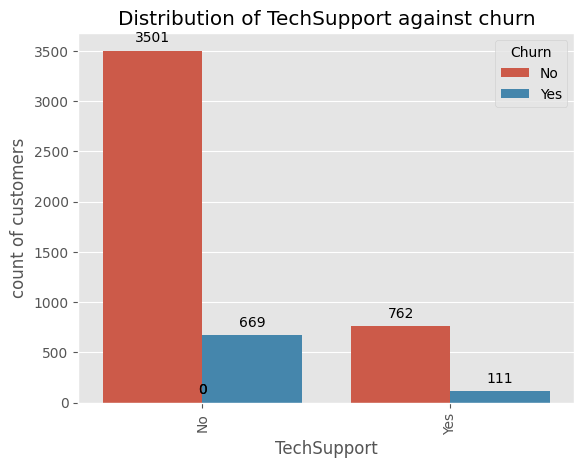

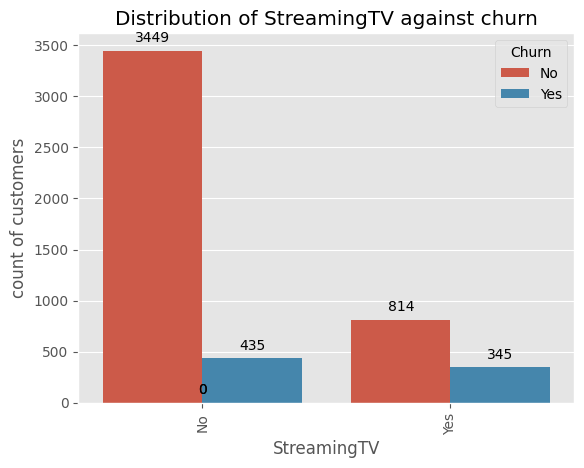

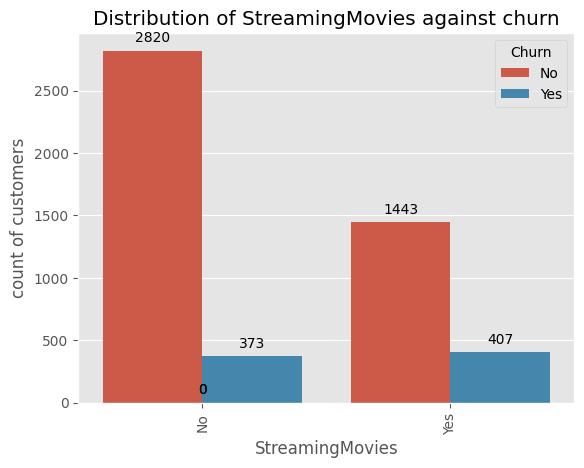

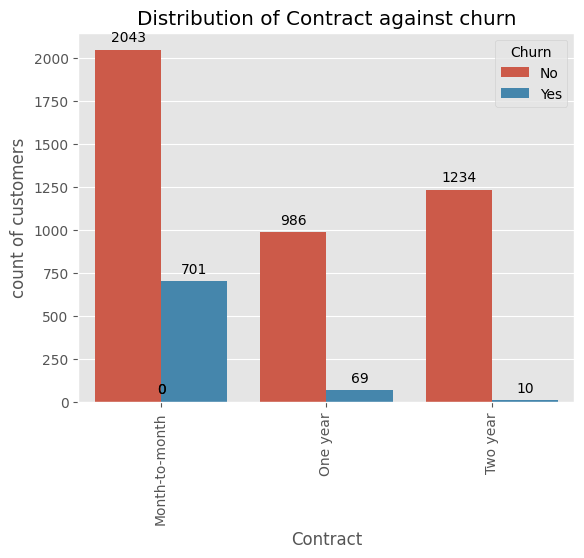

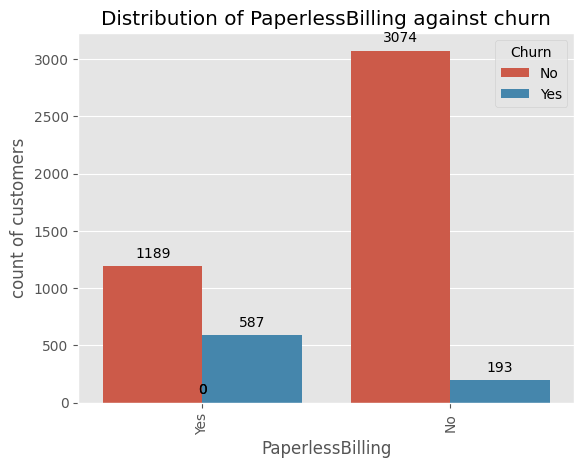

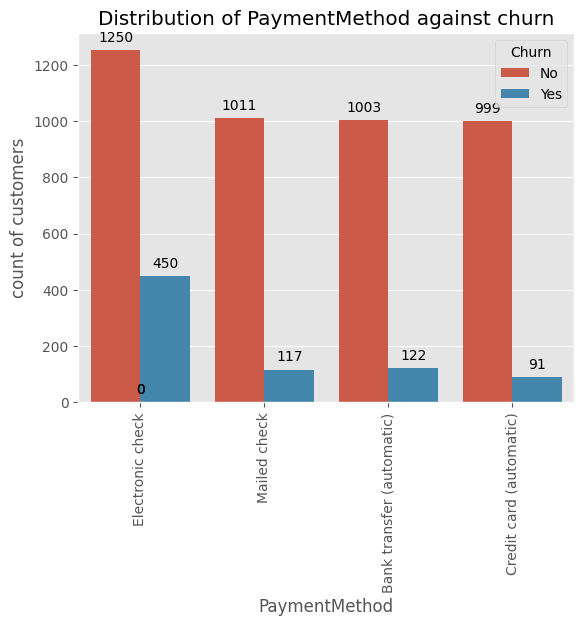

In [36]:
#Distribution of the categorical columns against churn
for i, predictor in enumerate(df.drop(columns=['Churn','TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i)
    plot=sns.countplot(data=df, x=predictor, hue='Churn')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {predictor} against churn')
    plt.xlabel(f'{predictor}')
    plt.ylabel('count of customers')
    # Annotate the bars with the actual counts
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    plt.show()

#### Conclusions 
- In both genders the people who are not likely to churn have a very high difference in number to those likely to churn.
- Senior citizens are more likely not churn compared to other citzens.
- People with no partners are likely not churn.
- Peoples that do not have dependents are likely not churn.
- Both people with phone service or without phone service are not likely to churn with no significant difference.
- Month to month contract have the highest number of people likely not churn.

In [37]:
#correlation_matrix = df.corr()

#plot heatmap of the correlation matrix
#plt.figure(figsize=(14,8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
#plt.title('Correlation Matrix')
#plt.show()

#### Hypothesis Test

**Hypothesis:**
- **Null Hypothesis (H0):** There is no significant relationship between the type of internet service (DSL, Fiber Optic, No) and customer churn.
- **Alternative Hypothesis (H1):** There is a significant relationship between the type of internet service (DSL, Fiber Optic, No) and customer churn.

In [38]:


# Create a contingency table
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Test Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0). There is a significant relationship between the type of internet service and customer churn.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant relationship between the type of internet service and customer churn.")

Chi-Square Test Statistic: 323.8655431943653
P-value: 4.715099437141375e-71
Degrees of Freedom: 2
Expected Frequencies Table:
[[1449.74122546  265.25877454]
 [1900.30220107  347.69779893]
 [ 912.95657347  167.04342653]]
Reject the null hypothesis (H0). There is a significant relationship between the type of internet service and customer churn.


#### Business Questions

1. **What are the demographic characteristics of customers who are more likely to churn?**
   - I will explore the relationship between demographic variables (gender, senior citizen status, partnership status, dependents) and churn. For instance, are senior citizens more likely to churn than younger customers? Do customers with dependents churn at a different rate compared to those without?







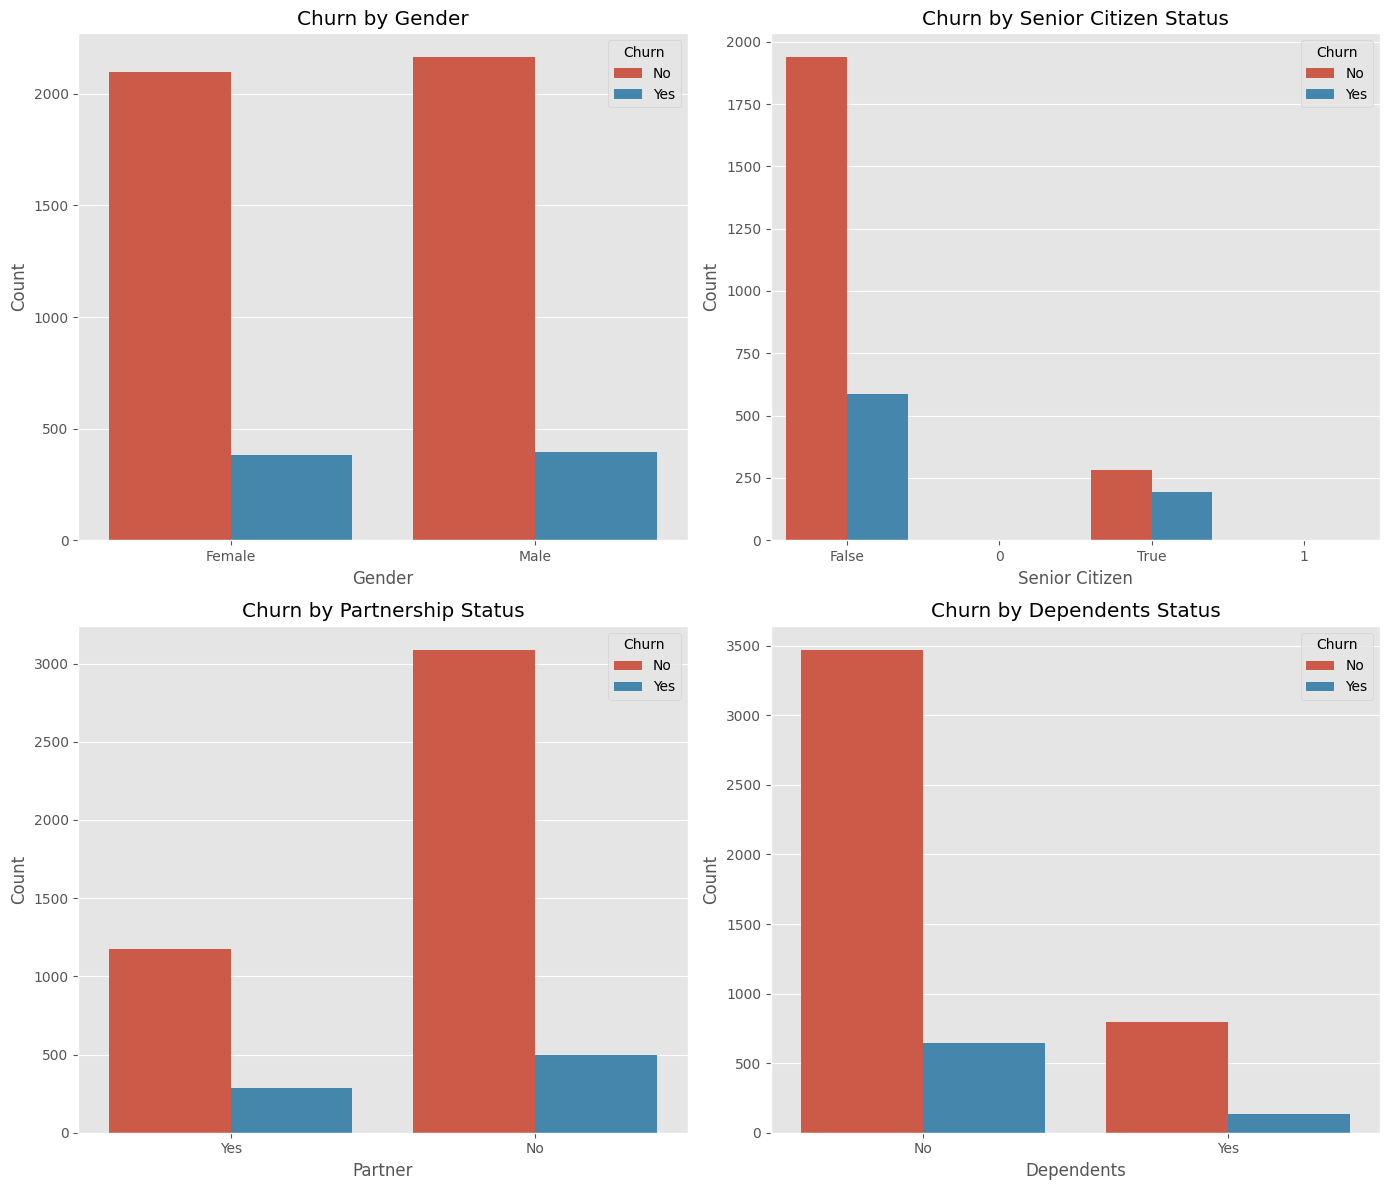

In [39]:
# Create a subplot for each demographic characteristic
# Set up the matplotlib figure
plt.figure(figsize=(14, 12))
# Churn by Gender
plt.subplot(2, 2, 1)
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn')

# Churn by Senior Citizen Status
plt.subplot(2, 2, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn')

# Churn by Partnership Status
plt.subplot(2, 2, 3)
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn by Partnership Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(title='Churn')

# Churn by Dependents Status
plt.subplot(2, 2, 4)
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Churn by Dependents Status')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn')

plt.tight_layout()
plt.show()

- Gender: Churn rates are consistent across genders.
- Senior Citizens: Higher churn rates among senior citizens.
- Partnership: Higher churn rates for customers without partners.
- Dependents: Higher churn rates for customers without dependents.

2. **How does the tenure of a customer relate to their likelihood of churning?**
   - By analyzing the tenure column, I will determine if customers who have been with the company longer are more or less likely to churn. This analysis could reveal critical points in the customer lifecycle where churn is more likely, enabling targeted retention efforts.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


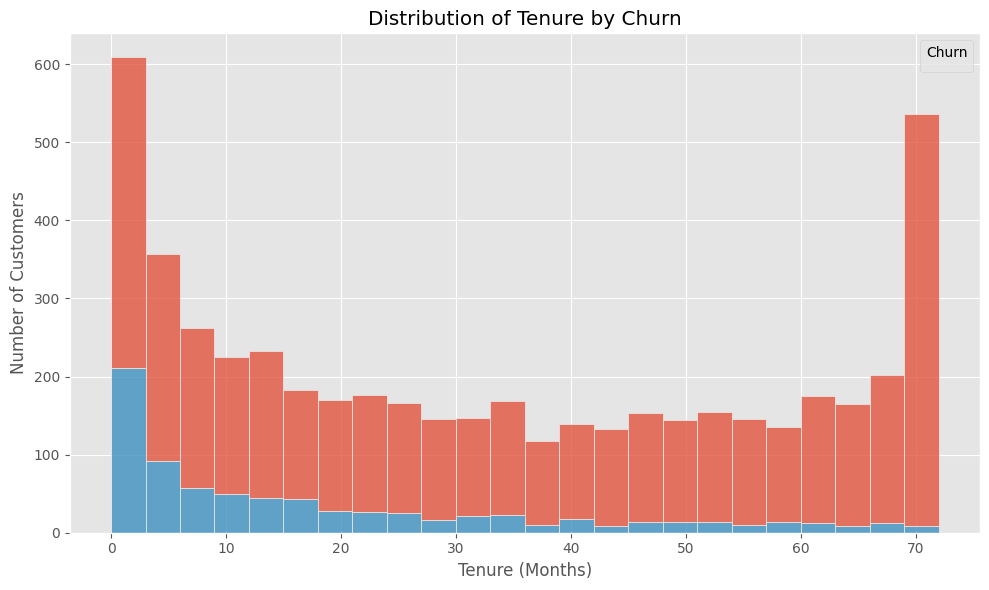

In [40]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the relationship between Tenure and Churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=False, binwidth=3)

plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')

plt.tight_layout()
plt.show()

- High Churn at Initial Tenure: There is a significant number of customers with very low tenure (0-10 months) who have churned, as shown by the blue bars. This indicates that a considerable number of customers leave early in their engagement.
- Steady Churn Distribution: Between 10 to 60 months, the churn distribution seems relatively steady, with churn (blue) remaining consistently lower than non-churn (red).
- Spike at 70 Months: There is a noticeable spike in the number of customers at the 70-month tenure mark, both for churned and non-churned customers. This might indicate a contractual or service milestone, such as a promotional period ending or a typical contract duration.

3. **What role do service-related factors (e.g., internet service, tech support) play in customer churn?**
   - I will understand how the type and quality of services provided (internet service, online security, online backup, device protection, tech support, streaming services) impact churn. For example, does having multiple services reduce the likelihood of churn?


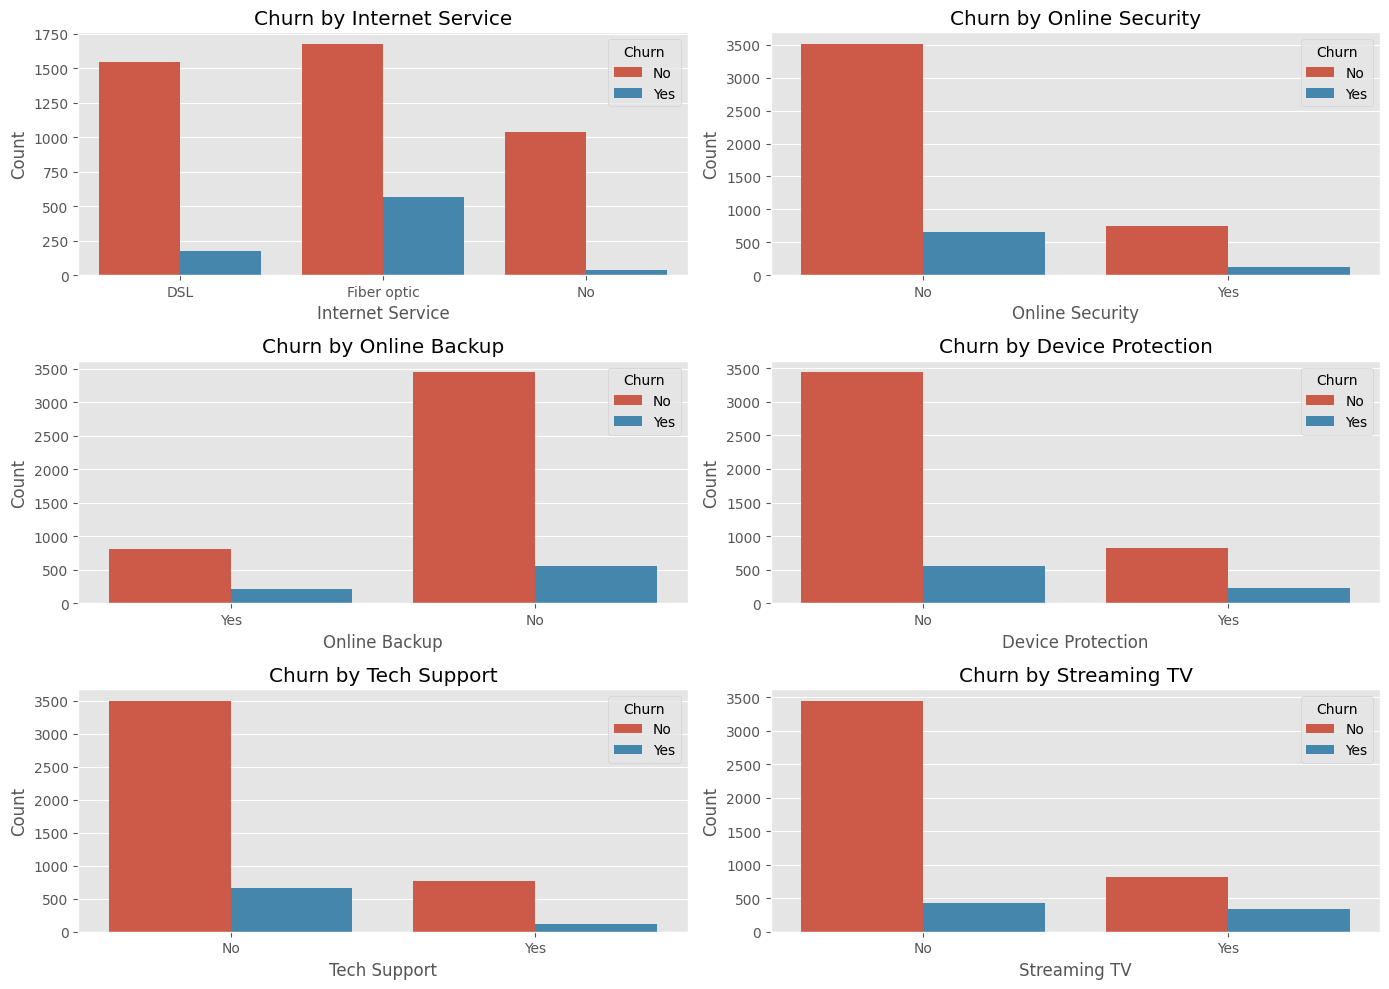

In [41]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Plot the relationship between each service-related factor and Churn

# Internet Service
plt.subplot(3, 2, 1)
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn')

# Online Security
plt.subplot(3, 2, 2)
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn by Online Security')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.legend(title='Churn')

# Online Backup
plt.subplot(3, 2, 3)
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.title('Churn by Online Backup')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.legend(title='Churn')

# Device Protection
plt.subplot(3, 2, 4)
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.title('Churn by Device Protection')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.legend(title='Churn')

# Tech Support
plt.subplot(3, 2, 5)
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.legend(title='Churn')

# Streaming TV
plt.subplot(3, 2, 6)
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.title('Churn by Streaming TV')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.legend(title='Churn')

plt.tight_layout()
plt.show()

- Internet Service:
Fiber optic customers have higher churn rates compared to DSL and no internet service.
This suggests that fiber optic services may need more attention to improve customer retention.
- Online Security, Backup, and Device Protection:
Customers using these additional services tend to have lower churn rates.
Offering and promoting these services might help in retaining customers.
- Tech Support:
Tech support appears to be a significant factor in reducing churn, with customers using tech support showing much lower churn rates.Ensuring good tech support could be a key strategy for reducing churn.
- Streaming TV:
Customers using streaming TV services have lower churn rates.
This indicates that bundling or promoting streaming services could help in retaining customers.

4. **How do different contract types and payment methods affect customer churn?**
   - I will examine the relationship between contract terms (month-to-month, one-year, two-year contracts), payment methods (electronic check, mailed check, bank transfer, credit card), and churn to provide insights into which contract types and payment methods are more stable.


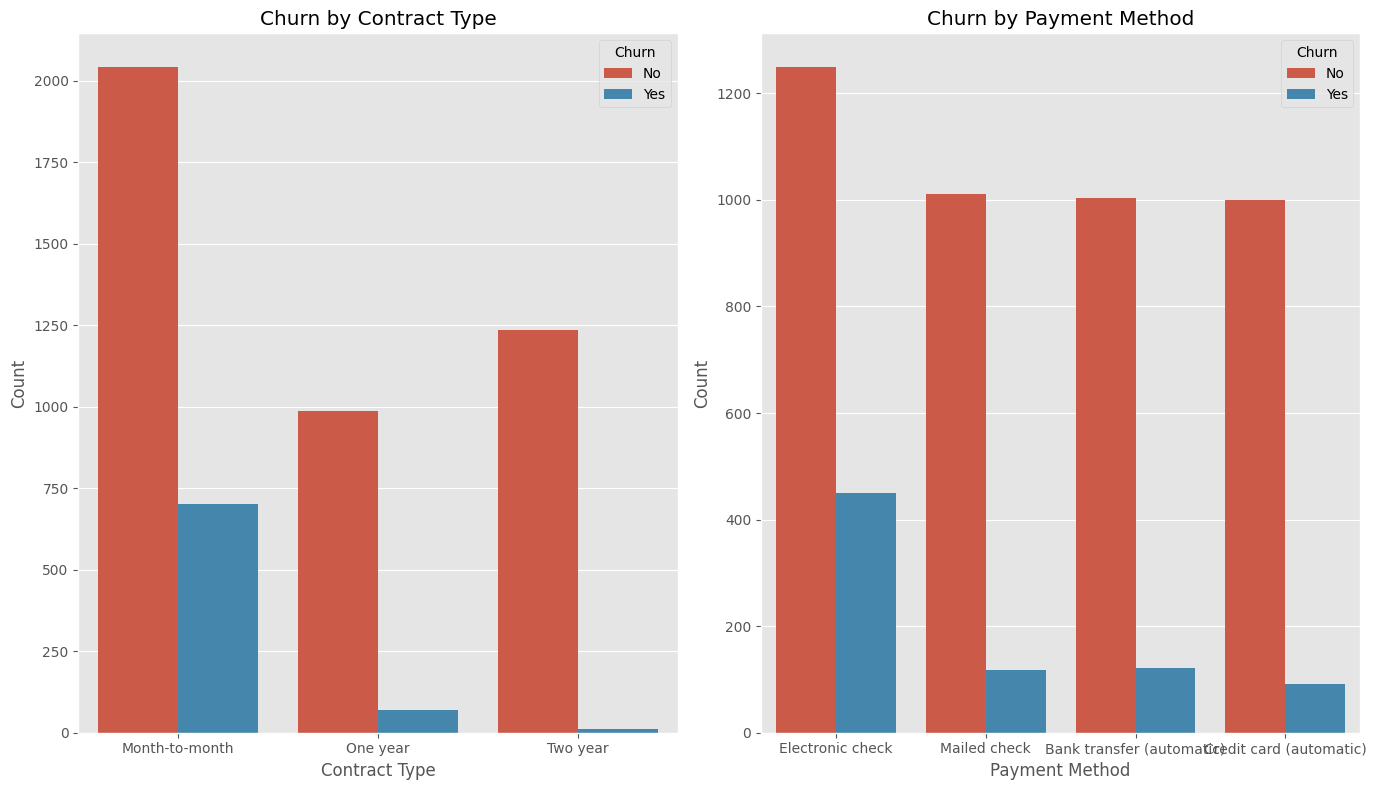

In [42]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot the relationship between Contract Type and Churn
plt.subplot(1, 2, 1)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')

# Plot the relationship between Payment Method and Churn
plt.subplot(1, 2, 2)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn')

plt.tight_layout()
plt.show()

- Contract Type:
Month-to-month contracts have the highest churn rates, suggesting customers on shorter contracts are more likely to leave.
One-year and two-year contracts are associated with significantly lower churn rates, indicating that longer-term commitments help in retaining customers.
- Payment Method:
Customers using electronic checks have higher churn rates compared to those using other payment methods.
Automatic payment methods (bank transfer and credit card) are associated with lower churn rates, possibly due to the convenience and consistency of automated payments.

5. **What is the relationship between monthly charges and total charges with customer churn?**
   - By analyzing the monthly charges and total charges, I will determine if higher or lower charges correlate with churn. This could indicate if pricing strategies need to be adjusted to retain customers.

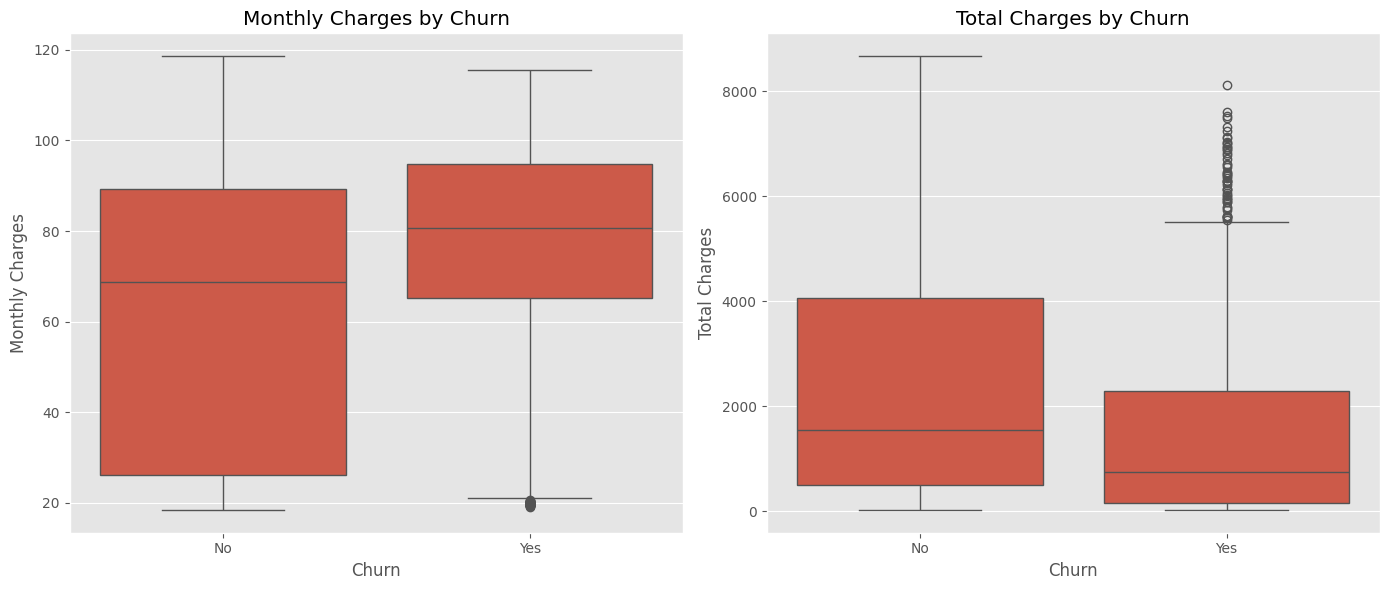

In [43]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot the relationship between Monthly Charges and Churn
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

# Plot the relationship between Total Charges and Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')

plt.tight_layout()
plt.show()

- Monthly Charges:
Customers who churned tend to have higher monthly charges compared to those who stayed. This might suggest that higher monthly charges could be a factor contributing to customer churn.
- Total Charges:
Customers who did not churn tend to have higher total charges, indicating longer tenure with the service. Conversely, customers who churned generally have lower total charges, suggesting they might have been with the service for a shorter period.

**Data Preparation**
 #### Split data into X, and y

In [44]:


#Splitting the data into X and y, training (80%) and testing (20%) set
# Identifying features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)





In [45]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,False,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000
1,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000
2,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002
3,Male,False,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000
4,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994


In [46]:
y.unique()

array([0, 1], dtype=int64)

In [47]:
#check for X columns
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [48]:
#checking for numerical columns in the prediction features
categorical_columns = X.select_dtypes('object').columns
categorical_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [49]:
#check for numerical features
numerical_columns= X.select_dtypes('number').columns
numerical_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [51]:
X.select_dtypes('number').skew()

tenure            0.225132
MonthlyCharges   -0.238767
TotalCharges      0.944846
dtype: float64

### Creating a Pipeline

In [52]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('power-transformation', PowerTransformer(method='yeo-johnson'))
])
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor= ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns)
])

# Applying preprocessing to the data
X = preprocessor.fit_transform(X)

In [53]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# Separate the data into x_train and y_train
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

In [54]:
#Label encoding the y variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


In [55]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler()),
                                                 ('power-transformation',
                                                  PowerTransformer())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

### modelling and Evaluation

In [125]:
# Defining the models
# Defining the models
models = {
    'random_forest': RandomForestClassifier(random_state=42),
    'knn': KNeighborsClassifier(),
    'xgboost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
    'lightgbm': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'catboost': cb.CatBoostClassifier(random_state=42, verbose=0),
    'adaboost': AdaBoostClassifier(random_state=42)
}

In [126]:
# Initializing KFold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [127]:
# Model Selection with HalvingGridSearchCV 
grid_searches = {}
for model_name, model in models.items():
    pipeline = Pipeline(
        steps=[
               ('model', model)
               ])

    # Halving Grid Search with Automatic Resource Detection
    grid_search = HalvingGridSearchCV(pipeline, {}, cv=kf, factor=2, scoring='accuracy', n_jobs=-1)

    # Fitting the model
    grid_search.fit(X_train, y_train)
    grid_searches[model_name] = grid_search

In [128]:
# Model Pipeline Structures
def display_pipelines(grid_searches, models_per_row=2):
    all_pipelines_html = "<div style='display: flex; flex-wrap: wrap;'>"
    for i, (model_name, grid_search) in enumerate(grid_searches.items()):
        all_pipelines_html += f"<div style='flex: 1 1 {50/models_per_row}%; margin: 10px;'> "
        all_pipelines_html += f"<h3>Pipeline Diagram for {model_name}:</h3>\n"
        all_pipelines_html += estimator_html_repr(grid_search.best_estimator_)
        all_pipelines_html += "</div>"  
        if (i + 1) % models_per_row == 0:
            all_pipelines_html += "<div style='clear: both;'></div>"
    all_pipelines_html += "</div>"  
    display(HTML(all_pipelines_html))

display_pipelines(grid_searches)

In [129]:
# Initializing a dictionary to hold evaluation metrics
evaluation_results = {}

# Evaluating each model on the validation set
for model_name, grid_search in grid_searches.items():
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1] if hasattr(
        grid_search.best_estimator_, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    evaluation_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': conf_matrix,
        'auc': auc
    }

df_scores = pd.DataFrame(evaluation_results).transpose()
df_scores_sorted = df_scores.sort_values(by="accuracy", ascending=False)

print("Model Evaluation Scores:")
df_scores_sorted

Model Evaluation Scores:


,accuracy,precision,recall,confusion_matrix,auc
catboost,0.92966,0.920781,0.940211,"[[784, 69], [51, 802]]",0.982411
xgboost,0.928488,0.918671,0.940211,"[[782, 71], [51, 802]]",0.980454
lightgbm,0.927902,0.912896,0.946073,"[[776, 77], [46, 807]]",0.982503
random_forest,0.927315,0.908175,0.950762,"[[771, 82], [42, 811]]",0.977107
adaboost,0.882767,0.854506,0.922626,"[[719, 134], [66, 787]]",0.955369
knn,0.880422,0.815969,0.982415,"[[664, 189], [15, 838]]",0.933601


**Analysis**
- CatBoost, XGBoost, LightGBM, and Random Forest:
These ensemble methods generally exhibit high precision and recall. They perform well in correctly identifying churn cases (high recall) while maintaining a good balance of correctly predicting churn cases when they predict churn (high precision). This makes them effective in identifying customers who are likely to churn without overly committing resources to customers who are unlikely to churn.
- KNN (K-Nearest Neighbors):
KNN achieves very high recall, suggesting it identifies nearly all churn cases. However, its precision is significantly lower, indicating it may generate a higher number of false positives. This could lead to more resources being allocated to customers who may not actually churn.


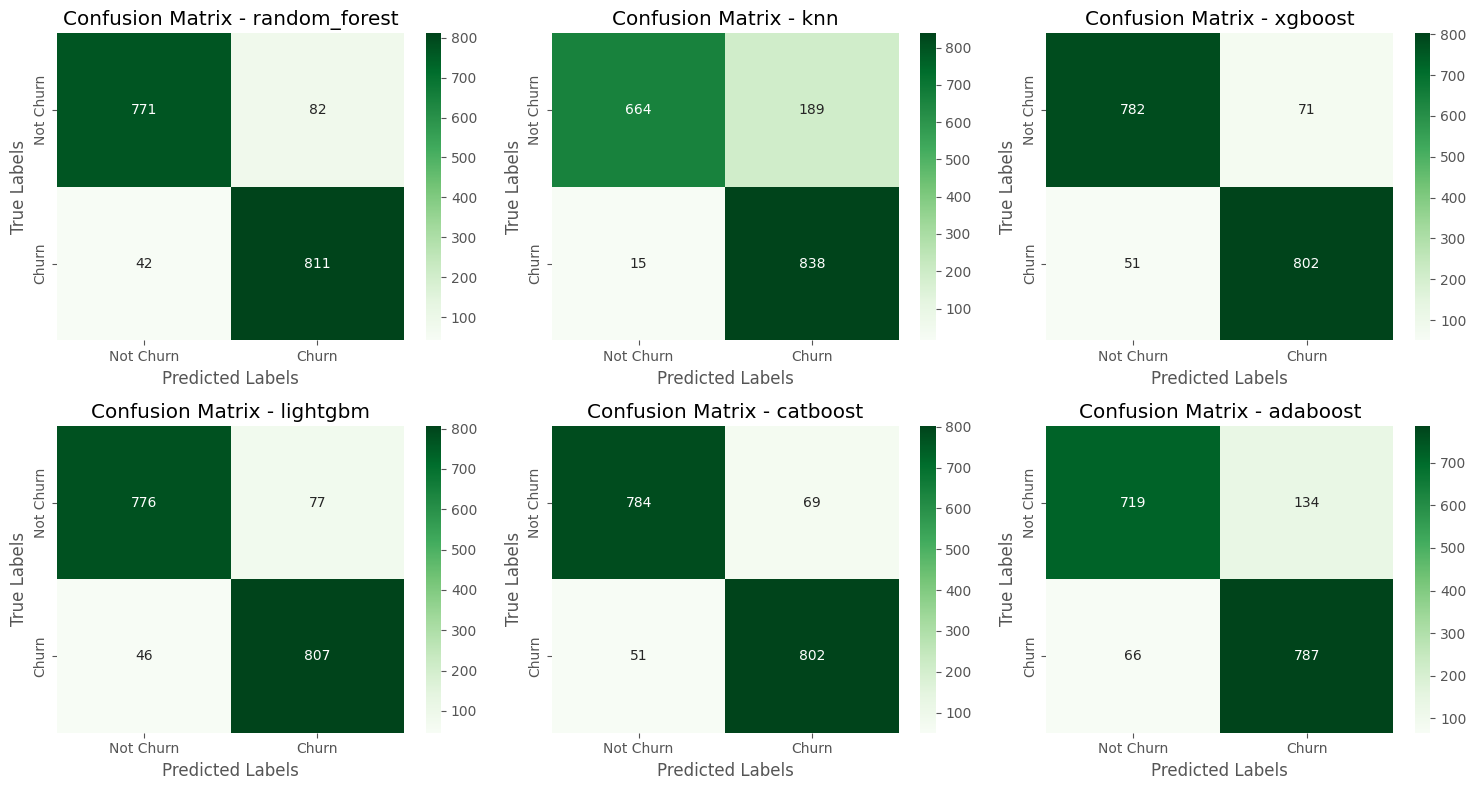

In [130]:
def plot_confusion_matrices(df_scores, figsize=(15, 8), ncols=3):
    nrows = int(np.ceil(len(df_scores.columns) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for i, (model_name, row) in enumerate(df_scores.iterrows()):
        conf_matrix = row['confusion_matrix']
        ax = axes.flat[i]
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Greens',
                    xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax)
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
    if nrows > 1 and ncols > 1:  
        plt.tight_layout()
    plt.show()

plot_confusion_matrices(df_scores)

**Conclusion**
- Summary of Model Performance
- Accuracy: CatBoost performs best with 95.0%, followed closely by LightGBM, XGBoost, and Random Forest.
- Precision: CatBoost has the highest precision at 92.1%, indicating fewer false positives.
- Recall: KNN has the highest recall at 98.2%, indicating fewer false negatives.
- F1-Score: CatBoost and LightGBM both have the highest F1-score at approximately 0.930, indicating a good balance between  precision and recall.
- Overall, CatBoost and LightGBM appear to be the top-performing models with high accuracy, precision, recall, and F1-scores.








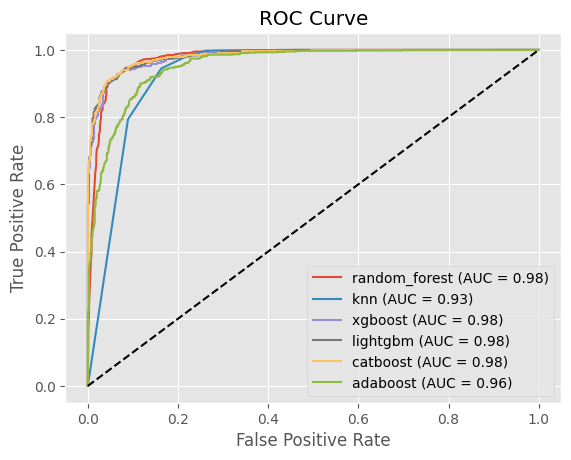

In [131]:
# ROC curve for each model
for model_name, grid_search in grid_searches.items():
    if evaluation_results[model_name]['auc'] is not None:
        fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {evaluation_results[model_name]['auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Conclusion**
Summary:
- Best Performing Models: Random Forest, XGBoost, LightGBM, and CatBoost, all with an AUC of 0.98. These models have excellent discrimination ability and are highly effective in distinguishing between churn and not churn.
- Good Performing Model: AdaBoost with an AUC of 0.96, indicating it also performs well but slightly less than the top-performing models.
- Decent Performing Model: KNN with an AUC of 0.93. Although it performs well, it is not as strong as the other models.
- The ROC curve and AUC values confirm the performance trends observed in the confusion matrices, highlighting that CatBoost, LightGBM, XGBoost, and Random Forest are among the top performers for this classification task.

## Hyperparameter Tuning

In [132]:

best_models = {
    'random_forest': RandomForestClassifier(random_state=42),
    'lightgbm': lgb.LGBMClassifier(random_state=42, objective='binary', verbose=-1),
}

# Defining the tuned parameter grid for each model
param_grid = {
    'random_forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5]
    },
    'lightgbm': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7],
        'model__num_leaves': [31, 63, 127]
    }
}


tuned_grid_searches = {}

for best_model_name, model in best_models.items(): 
    pipeline = Pipeline(steps=[('model', model)])
    tuned_grid_search = GridSearchCV(
        pipeline, param_grid[best_model_name], cv=5, n_jobs=-1, scoring='accuracy')

    tuned_grid_search.fit(X_train, y_train)
    tuned_grid_searches[best_model_name] = tuned_grid_search

In [134]:
# Initializing a dictionary to hold tuned evaluation metrics
tuned_evaluation_results = {}

# Evaluating each model on the validation set
for best_model_name, tuned_grid_search in tuned_grid_searches.items():
    y_pred = tuned_grid_search.predict(X_test)
    y_pred_proba = tuned_grid_search.predict_proba(X_test)[:, 1] if hasattr(
        tuned_grid_search.best_estimator_, "predict_proba") else None

    tuned_accuracy = accuracy_score(y_test, y_pred)
    tuned_precision = precision_score(y_test, y_pred, average='binary')
    tuned_recall = recall_score(y_test, y_pred, average='binary')
    tuned_conf_matrix = confusion_matrix(y_test, y_pred)
    tuned_auc = roc_auc_score(
        y_test, y_pred_proba) if y_pred_proba is not None else None

    tuned_evaluation_results[best_model_name] = {
        'accuracy': tuned_accuracy,
        'precision': tuned_precision,
        'recall': tuned_recall,
        'confusion_matrix': tuned_conf_matrix,
        'auc': tuned_auc
    }

tuned_df_scores = pd.DataFrame(tuned_evaluation_results).transpose()
tuned_df_scores_sorted = tuned_df_scores.sort_values(by="accuracy", ascending=False)
tuned_df_scores_sorted = tuned_df_scores_sorted.drop(columns=['confusion_matrix'])

print("Model Evaluation Scores:")
tuned_df_scores_sorted

Model Evaluation Scores:


,accuracy,precision,recall,auc
random_forest,0.928488,0.906563,0.955451,0.977454
lightgbm,0.923798,0.911263,0.939039,0.980766


#### conclusions
- Both Random Forest and LightGBM show excellent performance. Random Forest has a slight edge in recall, while LightGBM has a slight edge in precision and AUC. The choice between these models might depend on the specific application and whether the focus is more on minimizing false positives (favoring LightGBM) or capturing as many true positives as possible (favoring Random Forest).

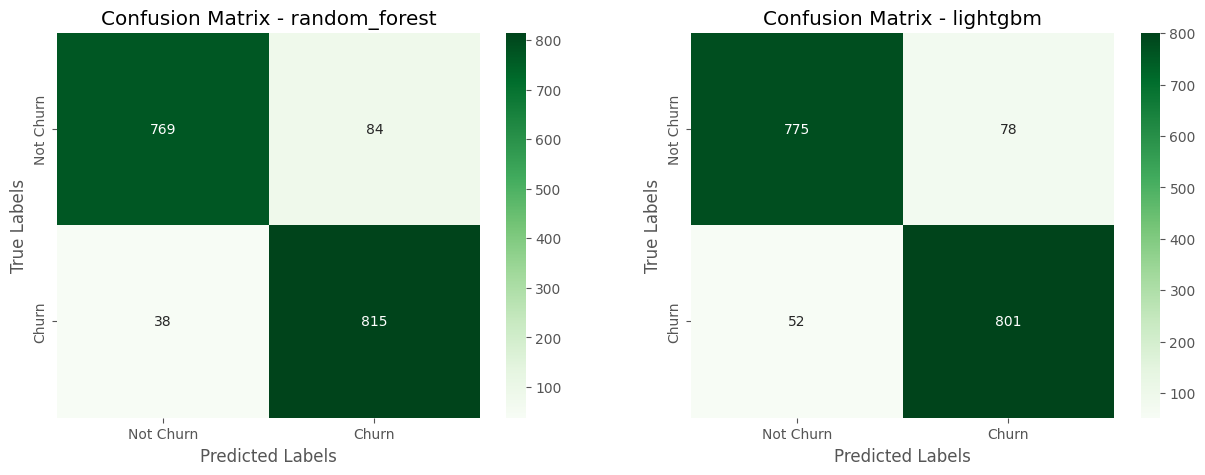

In [135]:
def plot_confusion_matrices(tuned_df_scores, figsize=(15, 5), ncols=2):
    nrows = int(np.ceil(len(tuned_df_scores) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

    for i, (best_model_name, row) in enumerate(tuned_df_scores.iterrows()):
        tuned_conf_matrix = row['confusion_matrix']
        ax = axes.flat[i]
        sns.heatmap(tuned_conf_matrix, annot=True, fmt="d", cmap='Greens',
                    xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax)
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')
        ax.set_title(f'Confusion Matrix - {best_model_name}')

    if nrows > 1 and ncols > 1:
        plt.tight_layout()
    plt.show()

plot_confusion_matrices(tuned_df_scores)

**Summary**:
- Random Forest: Performs slightly better in terms of recall and overall F1-Score, indicating it is better at identifying true positives while maintaining a good balance with precision.
- LightGBM: Performs slightly better in terms of precision, indicating it makes fewer false positive errors while maintaining a good balance with recall.

#### Exporting key components

In [136]:


# Ensure the directory exists
os.makedirs('Exports', exist_ok=True)

# Components to export
export_dict = {
    'preprocessing': {
        'preprocessor': preprocessor,
    },
    'tuned_models': tuned_grid_searches
}

# Serialize the object to a file
with open('Exports/churn_model_components.pkl', 'wb') as f:
    pickle.dump(export_dict, f)


In [137]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Test Prediction

In [139]:
# Loading the exported model components
with open('Exports/churn_model_components.pkl', 'rb') as f:
    exported_dict = pickle.load(f)

# Extract the components from the loaded dictionary
preprocessor = exported_dict['preprocessing']['preprocessor']
models = exported_dict['tuned_models']

In [97]:
# Preprocess the test data respectively 
test_data_processed = preprocessor.transform(test_data)

In [140]:
y_pred = models['random_forest'].predict(test_data_processed)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [141]:
test_data['SeniorCitizen'] = ['Yes' if x == 1 else 'No' for x in y_pred]
y_pred_labels = ['Yes' if x == 1 else 'No' for x in y_pred]
y_pred_labels_series = pd.Series(y_pred_labels)
y_pred_labels_series.head()

0    Yes
1     No
2     No
3     No
4    Yes
dtype: object

In [142]:
# Appending predicted churn to test_data
test_data['Churn'] = y_pred

# Concatenating test_data and train_data
churn_dataset = pd.concat([df, test_data], axis=0)

# Saving as Churn Dataset
# Directory to save the file
save_dir = 'data'

# Create directory if it does not exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the dataframe to a CSV file
save_path = os.path.join(save_dir, 'Churn_Dataset.csv')
churn_dataset.to_csv(save_path, index=False)

print(f'Dataset saved to {save_path}')

Dataset saved to data\Churn_Dataset.csv
